In [1]:
import pandas as pd

df = pd.read_csv('../data/cleaned/cleaned_retail.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009-12


In [2]:
total_revenue = df['TotalAmount'].sum()
total_revenue


np.float64(17743429.178000003)

In [3]:
total_orders = df['Invoice'].nunique()
total_orders


36969

In [4]:
total_customers = df['Customer ID'].nunique()
total_customers


5878

In [5]:
aov = total_revenue / total_orders
aov


np.float64(479.9542637885797)

In [6]:
monthly_revenue = (
    df
    .groupby(df['InvoiceDate'].dt.to_period('M'))['TotalAmount']
    .sum()
    .reset_index()
)

monthly_revenue.head()


,InvoiceDate,TotalAmount
0,2009-12,686654.160
1,2010-01,557319.062
2,2010-02,506371.066
3,2010-03,699608.991
4,2010-04,594609.192


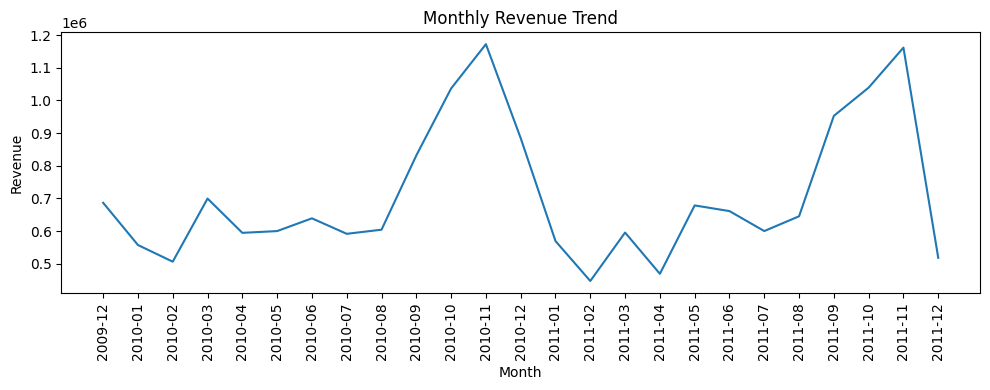

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(monthly_revenue['InvoiceDate'].astype(str),monthly_revenue['TotalAmount'])
plt.xticks(rotation=90)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


In [8]:
orders_per_customer = (
    df
    .groupby('Customer ID')['Invoice']
    .nunique()
)

orders_per_customer.head()


Customer ID
12346    12
12347     8
12348     5
12349     4
12350     1
Name: Invoice, dtype: int64

In [9]:
orders_per_customer.describe()


count    5878.000000
mean        6.289384
std        13.009406
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       398.000000
Name: Invoice, dtype: float64

In [10]:
one_time_customers = (orders_per_customer == 1).sum()
repeat_customers = (orders_per_customer > 1).sum()

one_time_customers, repeat_customers


(np.int64(1623), np.int64(4255))

In [11]:
total_customers = orders_per_customer.count()

one_time_pct = one_time_customers / total_customers * 100
repeat_pct = repeat_customers / total_customers * 100

one_time_pct, repeat_pct


(np.float64(27.611432460020414), np.float64(72.38856753997959))